# Serpent 2 Analysis Toolkit

This toolkit was developed for the Weighted Delta-tracking implementation into Serpent 2. It provides the ability to upload multiple Serpent 2 output files and compare their data.

## Initialization

Import the analysis core code, set `matplotlib` to plot inline and run nosetests (Warnings are exepcted due to pyne not being QA complient)

In [1]:
import analysis.core as wdt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!nosetests

/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


/home/josh/lib/anaconda2/lib/python2.7/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)
........................
----------------------------------------------------------------------
Ran 24 tests in 3.909s

OK


### Set Base Directory
Set the abslute location of the `wdt_runs` repo.

Ex: if the absolute path of the repo is `/home/josh/repos/wdt_runs/`:

```base_dir = '/home/josh/repos/'```

In [2]:
base_dir = '/home/josh/repos/'

# Scratch

In [ ]:
st_th = 0.1
wdt_th = 0.1
data = wdt.ParamData(st_th, wdt_th, base_dir)

In [ ]:
data.mat_stat('INF_SP0', plot = True)

In [ ]:
pltdata = data.mat_stat('INF_SP0')
logdata = np.where(pltdata > 0, np.log(pltdata), np.zeros(np.shape(pltdata)))
plt.matshow(logdata)


In [ ]:
data.cpu()

In [ ]:
np.log(data.mat_stat('INF_SP0',mean=True))

In [ ]:
np.bincount([0,1,2,3,0,6,0])

In [ ]:
1/(0.00039**2 * 49.3914)

## Analysis Tools

The `Analyzer` class is the workhorse of this data analysis, it initializes:

`wdt.Analyzer(st_vals, wdt_vals, base_dir, base_st=0.1, base_wdt=0.1)`

In [3]:
st_vals = [0.1]
wdt_vals = [0.1,0.2,0.3,0.4]
my_analyzer = wdt.Analyzer(st_vals, wdt_vals, base_dir)

### plot_mat

For a matrix quantity (like scattering matrices), this function will calculate the FOM (mean or stdev) for each cell, and then graph a heatmap of where the values are highest. Parameters are passed in a list of tuples to compare graphs (maximum of 10 graphs).

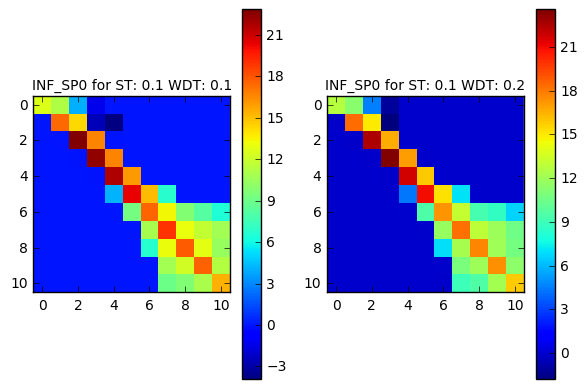

In [6]:
params = [(0.1, 0.1), (0.1, 0.2)] # Parameters to plot (list of tuples)
my_analyzer.plot_mat('INF_SP0',params, mean = True) # Mean                               

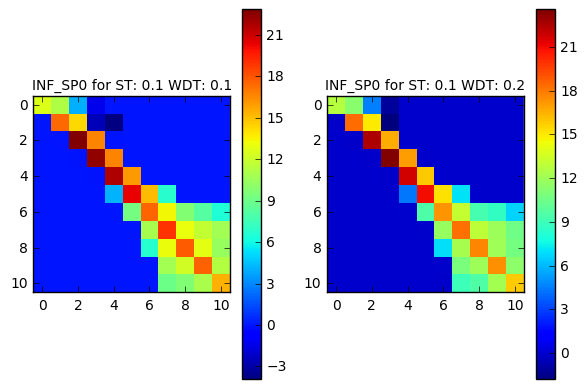

In [5]:
my_analyzer.plot_mat('INF_SP0', params, mean = False) #Stdev

In [ ]:
plt.figure(1)
plt.subplot(221)
my_analyzer.dataSets[0].mat_stat('INF_SP0', plot = True)
plt.subplot(222)
my_analyzer.dataSets[2].mat_stat('INF_SP0', plot = True)
plt.tight_layout()
plt.show()

In [ ]:
n = 4

assert n < 10, 'must pass less than 10 parameter sets'

rows = int((n-1)/3) + 1

plot_num = rows*100 + 30 + 1

for data in my_analyzer.dataSets[0:4]:
    plt.subplot(plot_num)
    data.mat_stat('INF_SP0', plot = True)
    plot_num = plot_num + 1
plt.tight_layout()


In [ ]:
param = 'INF_SCATT0'
get_mean = False
df=my_analyzer.data_frame(param,rel=False,mean=get_mean,style=False).sort_values(by='Ratio', ascending = not get_mean)[:5]
df2 = pd.concat([df.ix[:,0:2], df.ix[:,-1:]], axis=1)
print df2.to_latex(index=False).replace('\n', ' ')

In [ ]:
len(range(32))

In [ ]:
my_analyzer.histogram(['INF_FLX','INF_TOT','INF_ABS','INF_CAPT','INF_FISS','INF_SCATT0','INF_SCATT1'],mean=True)

In [ ]:
my_analyzer.plot('INF_FLX',[0.1],[0.6])
plt.title('Infinite flux FOM by neutron group for ST threshold 0.1, WDT threshold 0.6', fontsize=16)

In [ ]:
my_analyzer.plot('INF_FLX',[0.1],[0.6])
plt.title('Infinite total cross-section FOM by neutron group for ST threshold 0.1, WDT threshold 0.6', fontsize=14)

In [ ]:
my_analyzer.plot('INF_ABS',[0.1],[0.6])
plt.title('Infinite absorption cross-section FOM by neutron group for ST threshold 0.075, WDT threshold 0.3', fontsize=13)

In [ ]:
my_analyzer.plot('INF_CAPT',[0.1],[0.1])
plt.title('Infinite capture cross-section FOM by neutron group for ST threshold 0.075, WDT threshold 0.3', fontsize=14)